# Chapter 16: 베이즈 통계

조건부 확률과 비조건부확률을 연계시키는 베이즈 정리에 기반

베이즈 정리(Bayes' theorem). 어떤 사건이 서로 배반하는 원인 둘에 의해 일어난다고 할 때 실제 사건이 일어났을 때 이것이 두 원인 중 하나일 확률을 구하는 정리(사전 분포로부터 사후분포를 계산)

P(B∣A)= P(A)*P(A∣B)/P(B) 

P(A)는 **사전확률(prior)**이라고 하며 사건 B가 발생하기 전에 가지고 있던 사건 A의 확률이다. 만약 사건 B가 발생하면 이 정보를 반영하여 사건 A의 확률은 P(A|B)라는 값으로 변하게 되며 이를 **사후확률(posterior)**이라고 한다

In [1]:
import pymc3 as mc 

WARN: Could not locate executable g77
WARN: Could not locate executable f77
WARN: Could not locate executable ifort
WARN: Could not locate executable ifl
WARN: Could not locate executable f90
WARN: Could not locate executable DF
WARN: Could not locate executable efl
WARN: Could not locate executable gfortran
WARN: Could not locate executable f95
WARN: Could not locate executable g95
WARN: Could not locate executable efort
WARN: Could not locate executable efc
WARN: Could not locate executable flang
WARN: don't know how to compile Fortran code on platform 'nt'


WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
import numpy as np

In [3]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns
sns.set()

In [5]:
from scipy import stats

In [6]:
import statsmodels.api as sm

In [7]:
import statsmodels.formula.api as smf

In [8]:
import pandas as pd

In [9]:
# try this
# dir(mc.distributions)

전체 확률의 법칙: 
<img src="https://t1.daumcdn.net/cfile/tistory/126338495007B8BD22" width="400">

In [10]:
np.random.seed(100)

In [11]:
mu = 4.0

In [12]:
sigma = 2.0

In [13]:
model = mc.Model()

In [14]:
with model:
    mc.Normal('X', mu, tau=1/sigma**2)

In [15]:
model.vars

[X ~ Normal]

In [16]:
start = dict(X=2)

1000개의 정규분포 확률 변수

In [17]:
with model:
    step = mc.Metropolis()
    trace = mc.sample(10000, step=step, start=start)

C:\Users\RENTALHUB-HP100\AppData\Local\Temp\ipykernel_1748\752133409.py:3: DeprecationWarning: Call to deprecated Parameter start. (renamed to `initvals` in PyMC v4.0.0) -- Deprecated since v3.11.5.
  trace = mc.sample(10000, step=step, start=start)
C:\Users\RENTALHUB-HP100\anaconda3\envs\study\lib\site-packages\deprecat\classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Multiprocess sampling (4 chains in 4 jobs)
Metropolis: [X]


Sampling 4 chains for 1_000 tune and 10_000 draw iterations (4_000 + 40_000 draws total) took 35 seconds.
WARNING (aesara.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (aesara.configdefaults): g++ not detected!  Aesara will be unable to compile C-implementations and will default to Python. Performance may be severely degraded. To remove this warning, set Aesara flags cxx to an empty string.
WARNING (aesara.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
The number of effective samples is smaller than 25% for some parameters.


In [18]:
X = trace.get_values("X") 
print(X)

[3.2136023  3.2136023  3.2136023  ... 2.97328737 2.97328737 2.97328737]


In [19]:
x = np.linspace(-4, 12, 1000)

In [20]:
y = stats.norm(mu, sigma).pdf(x)

In [21]:
X = trace.get_values("X")

C:\Users\RENTALHUB-HP100\anaconda3\envs\study\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


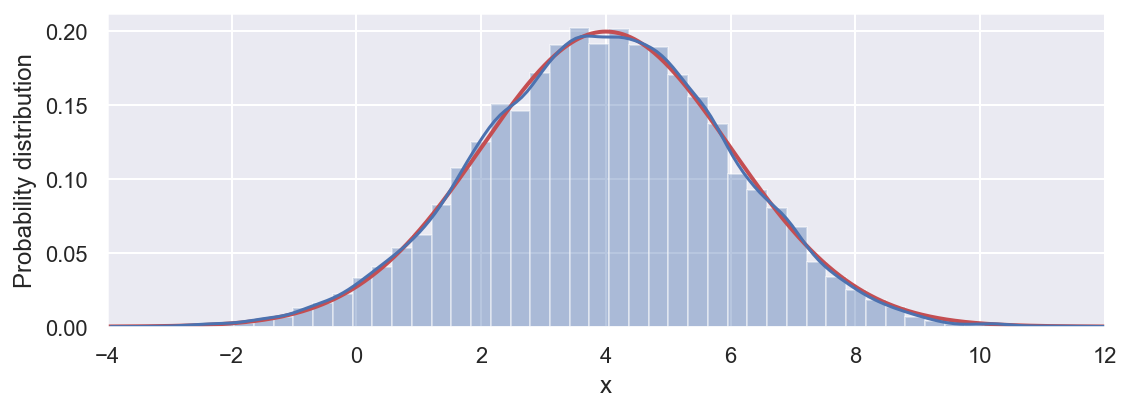

In [22]:
fig, ax = plt.subplots(figsize=(8, 3))

ax.plot(x, y, 'r', lw=2)
sns.distplot(X, ax=ax)
ax.set_xlim(-4, 12)
ax.set_xlabel("x")
ax.set_ylabel("Probability distribution")
fig.tight_layout()
fig.savefig("ch16-normal-distribution-sampled.pdf")

C:\Users\RENTALHUB-HP100\AppData\Local\Temp\ipykernel_1748\4081536508.py:2: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  mc.traceplot(trace)
Got error No model on context stack. trying to find log_likelihood in translation.
C:\Users\RENTALHUB-HP100\anaconda3\envs\study\lib\site-packages\arviz\data\io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
Got error No model on context stack. trying to find log_likelihood in translation.


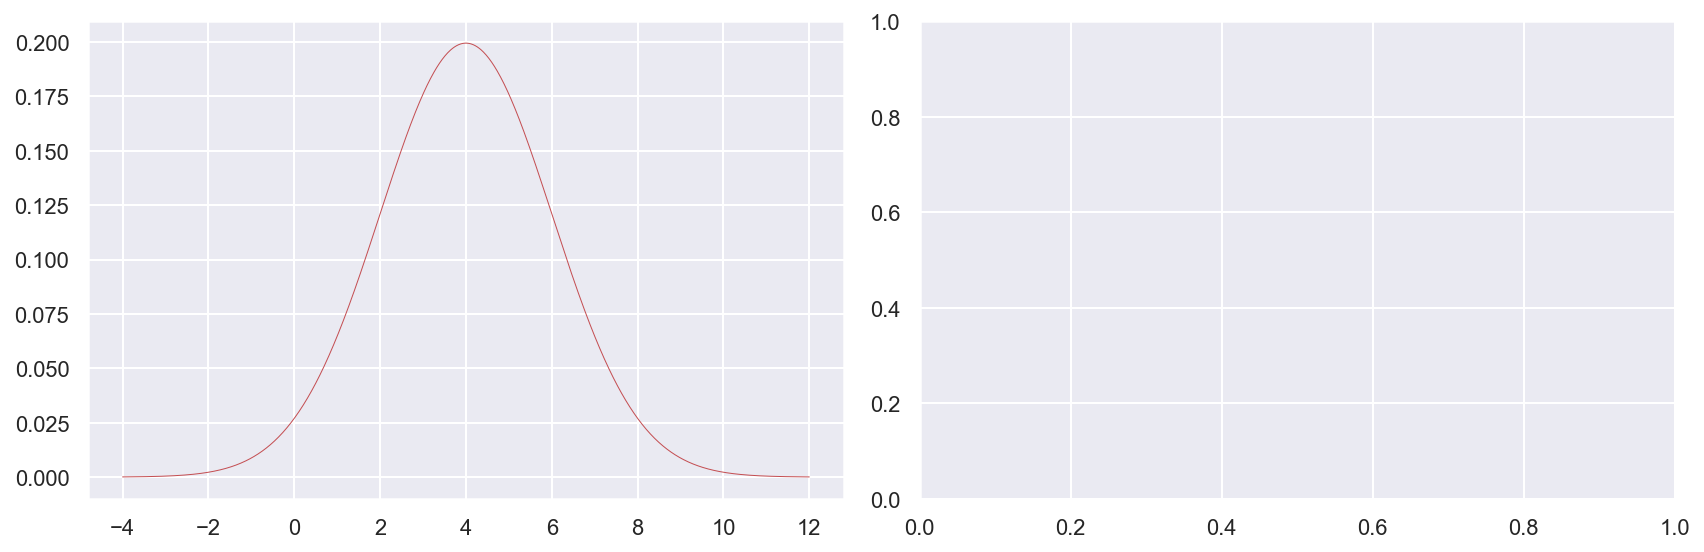

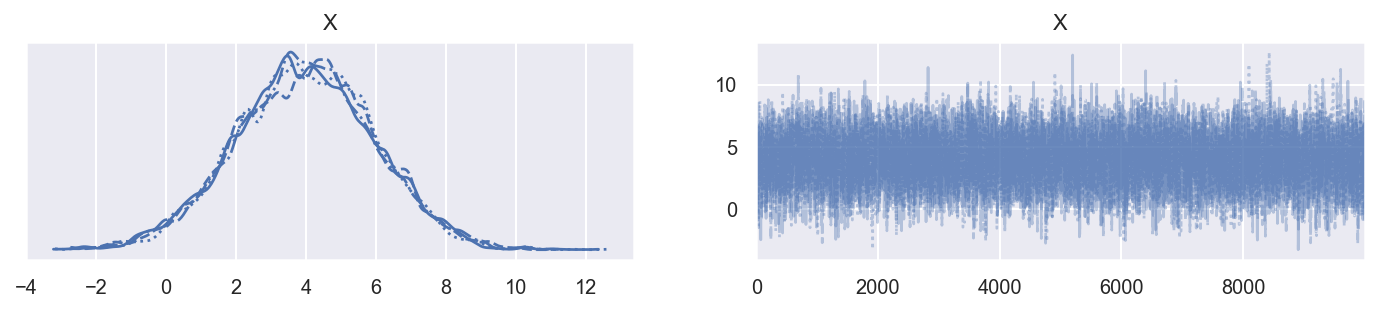

In [23]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4), squeeze=False)
mc.traceplot(trace)
axes[0,0].plot(x, y, 'r', lw=0.5)
fig.tight_layout()
fig.savefig("ch16-normal-sampling-trace.png")
fig.savefig("ch16-normal-sampling-trace.pdf")

## 종속확률변수

In [24]:
model = mc.Model()

In [25]:
with model:
    mean = mc.Normal('mean', 3.0)
    sigma = mc.HalfNormal('sigma', sd=1.0)
    X = mc.Normal('X', mean, tau=sigma)

In [26]:
model.vars

[mean ~ Normal, sigma_log__ ~ TransformedDistribution, X ~ Normal]

find_MAP함수로 사후 분포의 최댓값에 해당하는 점 찾기 가능

In [27]:
with model:
    start = mc.find_MAP()

C:\Users\RENTALHUB-HP100\anaconda3\envs\study\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: divide by zero encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\RENTALHUB-HP100\anaconda3\envs\study\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in multiply
  variables = ufunc(*ufunc_args, **ufunc_kwargs)


In [28]:
start

{'mean': array(3.),
 'sigma_log__': array(-0.34657365),
 'X': array(3.),
 'sigma': array(0.70710674)}

In [29]:
with model:
    step = mc.Metropolis()
    trace = mc.sample(10000, start=start, step=step)

C:\Users\RENTALHUB-HP100\AppData\Local\Temp\ipykernel_1748\3351488652.py:3: DeprecationWarning: Call to deprecated Parameter start. (renamed to `initvals` in PyMC v4.0.0) -- Deprecated since v3.11.5.
  trace = mc.sample(10000, start=start, step=step)
C:\Users\RENTALHUB-HP100\anaconda3\envs\study\lib\site-packages\deprecat\classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [X]
>Metropolis: [sigma]
>Metropolis: [mean]


Sampling 4 chains for 1_000 tune and 10_000 draw iterations (4_000 + 40_000 draws total) took 39 seconds.
The number of effective samples is smaller than 10% for some parameters.


In [30]:
trace.get_values('sigma').mean()

0.7811865944958784

In [31]:
X = trace.get_values('X')

In [32]:
X.mean()

3.0451838555685034

In [33]:
trace.get_values('X').std()

2.5155828763297987

In [34]:
mc.traceplot

<function arviz.plots.traceplot.plot_trace(data: arviz.data.inference_data.InferenceData, var_names: Optional[Sequence[str]] = None, filter_vars: Optional[str] = None, transform: Optional[Callable] = None, coords: Optional[Dict[str, List[Any]]] = None, divergences: Optional[str] = 'auto', kind: Optional[str] = 'trace', figsize: Optional[Tuple[float, float]] = None, rug: bool = False, lines: Optional[List[Tuple[str, Dict[str, List[Any]], Any]]] = None, circ_var_names: Optional[List[str]] = None, circ_var_units: str = 'radians', compact: bool = True, compact_prop: Union[str, Mapping[str, Any], NoneType] = None, combined: bool = False, chain_prop: Union[str, Mapping[str, Any], NoneType] = None, legend: bool = False, plot_kwargs: Optional[Dict[str, Any]] = None, fill_kwargs: Optional[Dict[str, Any]] = None, rug_kwargs: Optional[Dict[str, Any]] = None, hist_kwargs: Optional[Dict[str, Any]] = None, trace_kwargs: Optional[Dict[str, Any]] = None, rank_kwargs: Optional[Dict[str, Any]] = None, l

C:\Users\RENTALHUB-HP100\AppData\Local\Temp\ipykernel_1748\481554694.py:2: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  mc.traceplot(trace)
Got error No model on context stack. trying to find log_likelihood in translation.
C:\Users\RENTALHUB-HP100\anaconda3\envs\study\lib\site-packages\arviz\data\io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
Got error No model on context stack. trying to find log_likelihood in translation.


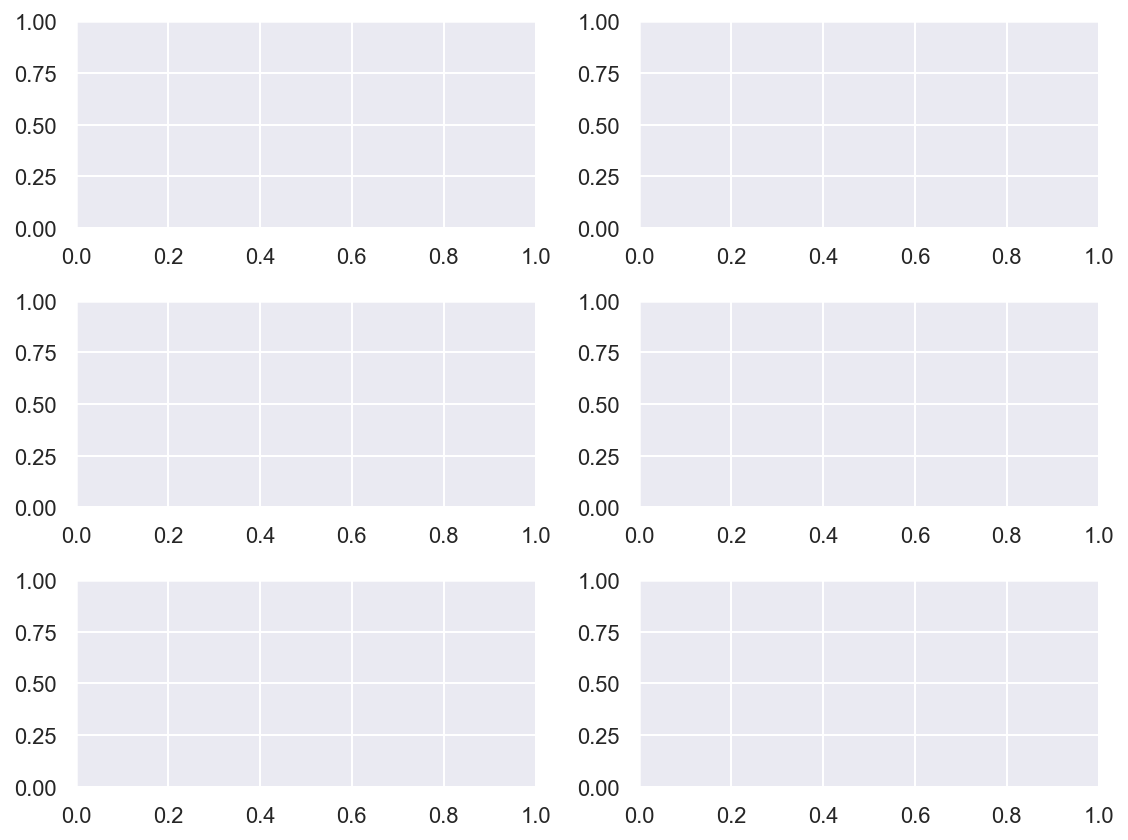

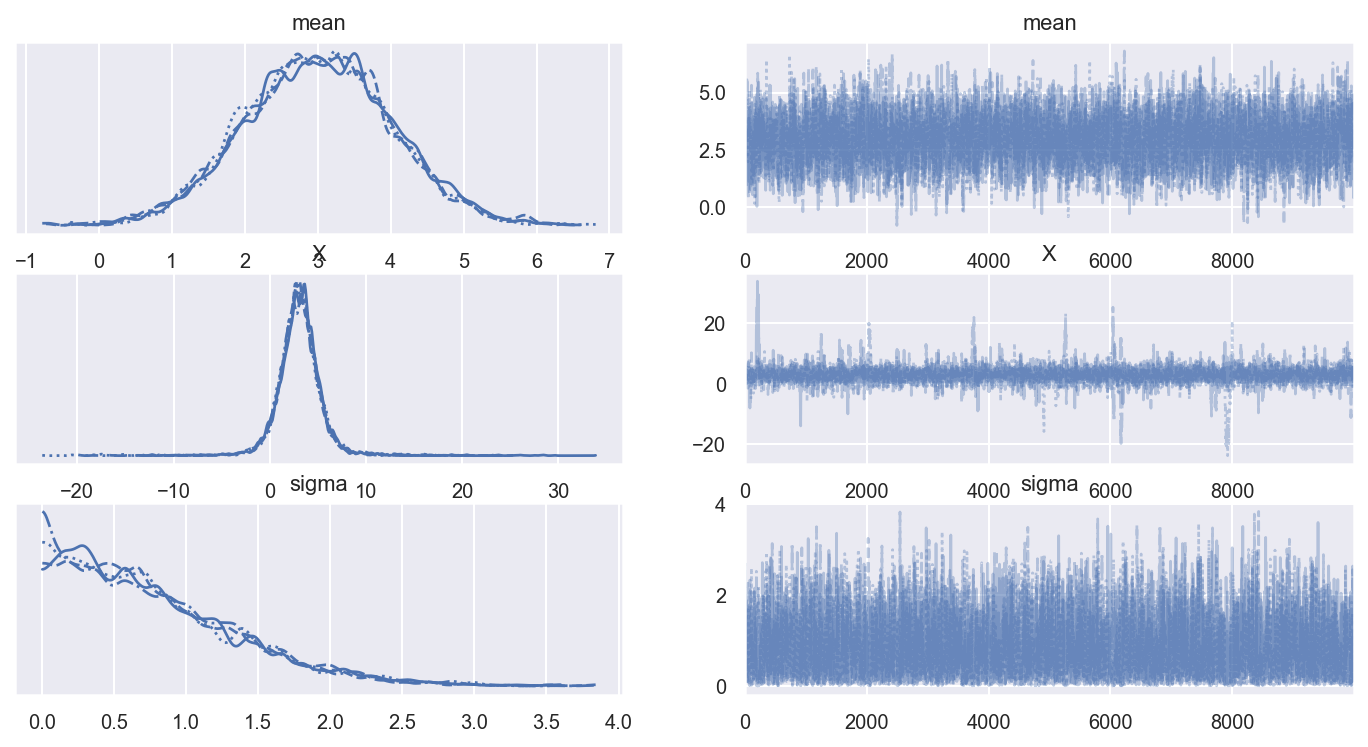

In [35]:
fig, axes = plt.subplots(3, 2, figsize=(8, 6), squeeze=False)
mc.traceplot(trace)
fig.tight_layout()
fig.savefig("ch16-dependent-rv-sample-trace.png")
fig.savefig("ch16-dependent-rv-sample-trace.pdf")

## 사후표본 추출

In [36]:
mu = 2.5

In [37]:
s = 1.5

In [38]:
data = stats.norm(mu, s).rvs(100)

In [39]:
with mc.Model() as model:
    
    mean = mc.Normal('mean', 4.0, tau=1.0) # true 2.5
    sigma = mc.HalfNormal('sigma', tau=3.0 * np.sqrt(np.pi/2)) # true 1.5

    X = mc.Normal('X', mean, tau=1/sigma**2, observed=data)#obsercet=data로 data안에있는 값 관측햇다고 나타냄

In [40]:
model.vars

[mean ~ Normal, sigma_log__ ~ TransformedDistribution]

In [41]:
with model:
    start = mc.find_MAP()
    step = mc.Metropolis()
    trace = mc.sample(10000, start=start, step=step)
    #step = mc.NUTS()
    #trace = mc.sample(10000, start=start, step=step)

C:\Users\RENTALHUB-HP100\anaconda3\envs\study\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: divide by zero encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\RENTALHUB-HP100\anaconda3\envs\study\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in multiply
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\RENTALHUB-HP100\anaconda3\envs\study\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)


C:\Users\RENTALHUB-HP100\AppData\Local\Temp\ipykernel_1748\843077149.py:4: DeprecationWarning: Call to deprecated Parameter start. (renamed to `initvals` in PyMC v4.0.0) -- Deprecated since v3.11.5.
  trace = mc.sample(10000, start=start, step=step)
C:\Users\RENTALHUB-HP100\anaconda3\envs\study\lib\site-packages\deprecat\classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [sigma]
>Metropolis: [mean]


Sampling 4 chains for 1_000 tune and 10_000 draw iterations (4_000 + 40_000 draws total) took 136 seconds.
The number of effective samples is smaller than 25% for some parameters.


In [42]:
start

{'mean': array(2.30048494),
 'sigma_log__': array(0.3732095),
 'sigma': array(1.45238858)}

In [43]:
model.vars

[mean ~ Normal, sigma_log__ ~ TransformedDistribution]

C:\Users\RENTALHUB-HP100\AppData\Local\Temp\ipykernel_1748\1298352232.py:2: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  mc.traceplot(trace)
Got error No model on context stack. trying to find log_likelihood in translation.
C:\Users\RENTALHUB-HP100\anaconda3\envs\study\lib\site-packages\arviz\data\io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
Got error No model on context stack. trying to find log_likelihood in translation.


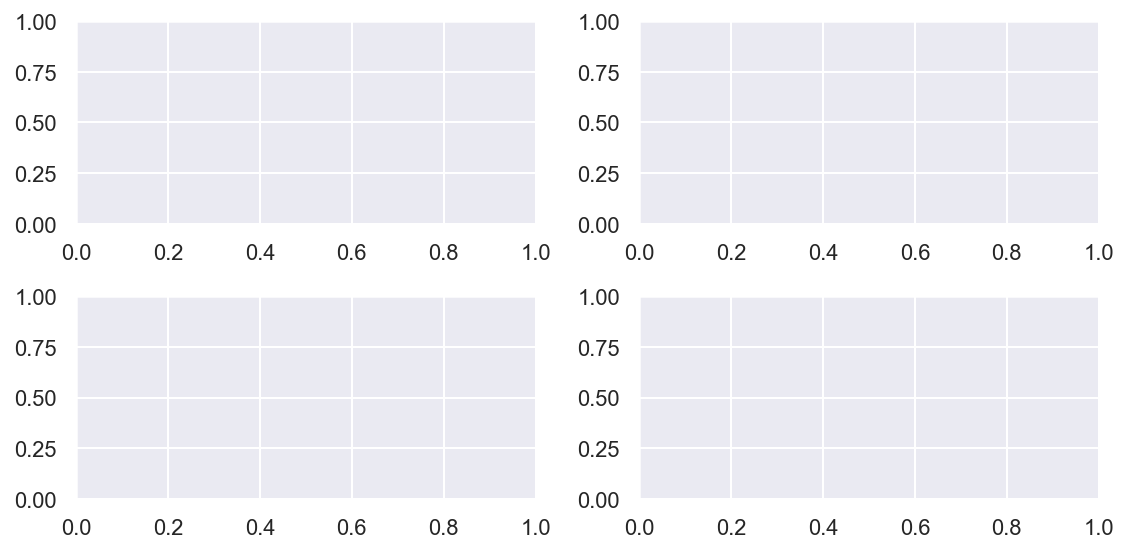

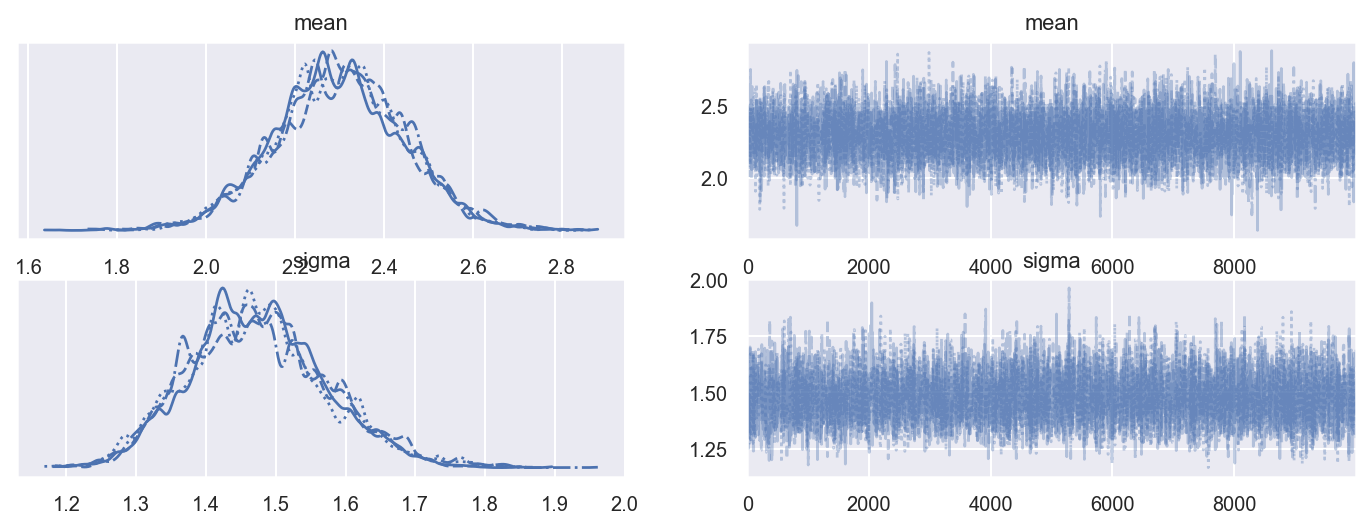

In [44]:
fig, axes = plt.subplots(2, 2, figsize=(8, 4), squeeze=False)
mc.traceplot(trace)
fig.tight_layout()
fig.savefig("ch16-posterior-sample-trace.png")
fig.savefig("ch16-posterior-sample-trace.pdf")

In [45]:
mu, trace.get_values('mean').mean()

(2.5, 2.3002842218876682)

In [46]:
s, trace.get_values('sigma').mean()

(1.5, 1.474162868456258)

C:\Users\RENTALHUB-HP100\AppData\Local\Temp\ipykernel_1748\2947303182.py:1: DeprecationWarning: The function `forestplot` from PyMC3 is just an alias for `plot_forest` from ArviZ. Please switch to `pymc3.plot_forest` or `arviz.plot_forest`.
  gs = mc.forestplot(trace)
Got error No model on context stack. trying to find log_likelihood in translation.
C:\Users\RENTALHUB-HP100\anaconda3\envs\study\lib\site-packages\arviz\data\io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


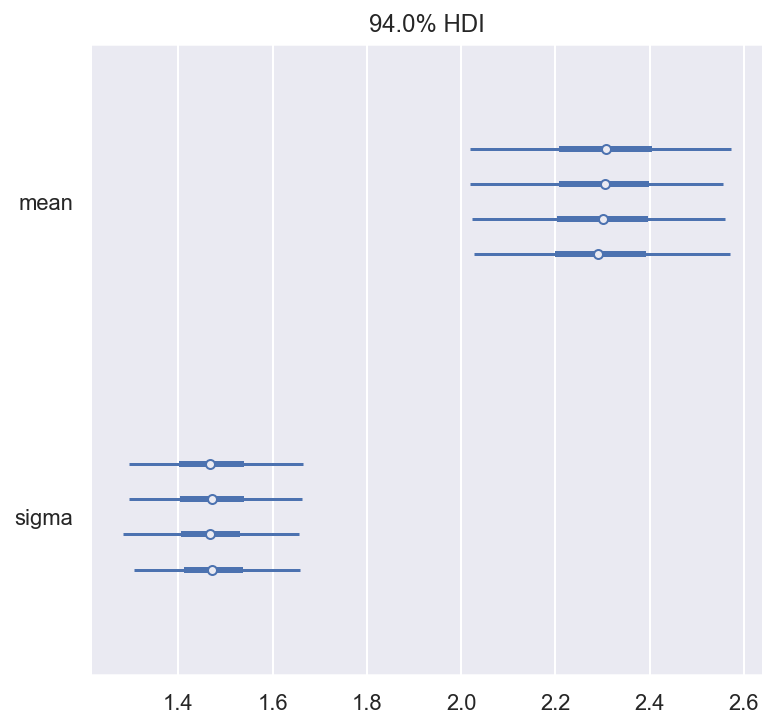

In [47]:
gs = mc.forestplot(trace)
plt.savefig("ch16-forestplot.pdf")

In [48]:
help(mc.summary)

Help on function summary in module arviz.stats.stats:

summary(data, var_names: Optional[List[str]] = None, filter_vars=None, group=None, fmt: "Literal['wide', 'long', 'xarray']" = 'wide', kind: "Literal['all', 'stats', 'diagnostics']" = 'all', round_to=None, circ_var_names=None, stat_focus='mean', stat_funcs=None, extend=True, hdi_prob=None, skipna=False, labeller=None, coords=None, index_origin=None, order=None) -> Union[pandas.core.frame.DataFrame, xarray.core.dataset.Dataset]
    Create a data frame with summary statistics.
    
    Parameters
    ----------
    data: obj
        Any object that can be converted to an :class:`arviz.InferenceData` object
        Refer to documentation of :func:`arviz.convert_to_dataset` for details
    var_names: list
        Names of variables to include in summary. Prefix the variables by ``~`` when you
        want to exclude them from the summary: `["~beta"]` instead of `["beta"]` (see
        examples below).
    filter_vars: {None, "like", "re

In [49]:
mc.summary(trace)

Got error No model on context stack. trying to find log_likelihood in translation.
C:\Users\RENTALHUB-HP100\anaconda3\envs\study\lib\site-packages\arviz\data\io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
mean,2.300,0.146,2.028,2.573,0.002,0.001,6527.0,6358.0,1.0
sigma,1.474,0.099,1.295,1.663,0.001,0.001,5297.0,5572.0,1.0


## Linear regression

In [50]:
dataset = sm.datasets.get_rdataset("Davis", "carData")

In [51]:
data = dataset.data[dataset.data.sex == 'M']

In [52]:
data = data[data.weight < 110]

In [53]:
data.head(3)

,sex,weight,height,repwt,repht
0,M,77,182,77.0,180.0
3,M,68,177,70.0,175.0
5,M,76,170,76.0,165.0


In [54]:
model = smf.ols("height ~ weight", data=data)

In [55]:
result = model.fit()

In [56]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                 height   R-squared:                       0.327
Model:                            OLS   Adj. R-squared:                  0.319
Method:                 Least Squares   F-statistic:                     41.35
Date:                Mon, 22 Aug 2022   Prob (F-statistic):           7.11e-09
Time:                        12:07:10   Log-Likelihood:                -268.20
No. Observations:                  87   AIC:                             540.4
Df Residuals:                      85   BIC:                             545.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    152.6173      3.987     38.281      0.0

In [57]:
x = np.linspace(50, 110, 25)

In [58]:
y = result.predict({"weight": x})

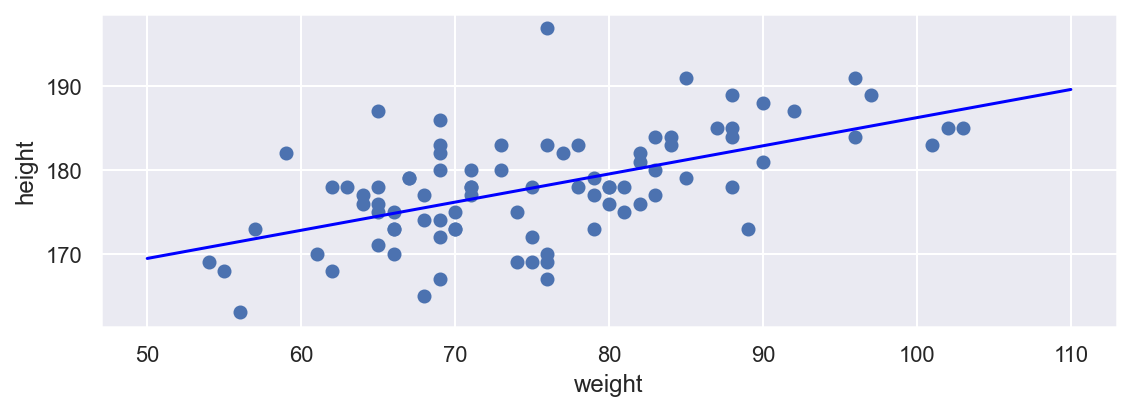

In [59]:
fig, ax = plt.subplots(1, 1, figsize=(8, 3))
ax.plot(data.weight, data.height, 'o')
ax.plot(x, y, color="blue")
ax.set_xlabel("weight")
ax.set_ylabel("height")
fig.tight_layout()
fig.savefig("ch16-linear-ols-fit.pdf")

In [60]:
with mc.Model() as model:
    sigma = mc.Uniform('sigma', 0, 10)
    intercept = mc.Normal('intercept', 125, sd=30)
    beta = mc.Normal('beta', 0, sd=5)
    
    height_mu = intercept + beta * data.weight

    # likelihood function
    mc.Normal('height', mu=height_mu, sd=sigma, observed=data.height)

    # predict
    predict_height = mc.Normal('predict_height', mu=intercept + beta * x, sd=sigma, shape=len(x)) 

### 사전분포모델

In [61]:
model.vars

[sigma_interval__ ~ TransformedDistribution,
 intercept ~ Normal,
 beta ~ Normal,
 predict_height ~ Normal]

In [62]:
# help(mc.NUTS)

In [ ]:
with model:
    # start = mc.find_MAP()
    step = mc.NUTS()
    trace = mc.sample(10000, step) # , start=start)

C:\Users\RENTALHUB-HP100\anaconda3\envs\study\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: divide by zero encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\RENTALHUB-HP100\anaconda3\envs\study\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in multiply
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\RENTALHUB-HP100\anaconda3\envs\study\lib\site-packages\deprecat\classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [predict_height, beta, intercept, sigma]


In [ ]:
model.vars

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(8, 4), squeeze=False)
mc.traceplot(trace)
fig.savefig("ch16-linear-model-sample-trace.pdf")
fig.savefig("ch16-linear-model-sample-trace.png")

In [ ]:
intercept = trace.get_values("intercept").mean()
intercept

In [ ]:
beta = trace.get_values("beta").mean()
beta

In [ ]:
result.params

In [ ]:
result.predict({"weight": 90})

In [ ]:
weight_index = np.where(x == 90)[0][0]

In [ ]:
trace.get_values("predict_height")[:, weight_index].mean()

In [ ]:
fig, ax = plt.subplots(figsize=(8, 3))

sns.distplot(trace.get_values("predict_height")[:, weight_index], ax=ax)
ax.set_xlim(150, 210)
ax.set_xlabel("height")
ax.set_ylabel("Probability distribution")
fig.tight_layout()
fig.savefig("ch16-linear-model-predict-cut.pdf")

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(12, 4))

for n in range(500, 2000, 1):
    intercept = trace.get_values("intercept")[n]
    beta = trace.get_values("beta")[n]
    ax.plot(x, intercept + beta * x, color='red', lw=0.25, alpha=0.05)

intercept = trace.get_values("intercept").mean()
beta = trace.get_values("beta").mean()
ax.plot(x, intercept + beta * x, color='k', label="Mean Bayesian prediction")

ax.plot(data.weight, data.height, 'o')
ax.plot(x, y, '--', color="blue", label="OLS prediction")
ax.set_xlabel("weight")
ax.set_ylabel("height")
ax.legend(loc=0)
fig.tight_layout()
fig.savefig("ch16-linear-model-fit.pdf")
fig.savefig("ch16-linear-model-fit.png")

In [ ]:
with mc.Model() as model:
    mc.glm.GLM.from_formula('height ~ weight', data)
    step = mc.NUTS()
    trace = mc.sample(2000, step)

In [ ]:
fig, axes = plt.subplots(3, 2, figsize=(8, 6), squeeze=False)
mc.traceplot(trace)
fig.tight_layout()
fig.savefig("ch16-glm-sample-trace.pdf")
fig.savefig("ch16-glm-sample-trace.png")

## Multilevel model(남녀나누어서0

In [ ]:
dataset = sm.datasets.get_rdataset("Davis", "carData")

In [ ]:
data = dataset.data.copy()
data = data[data.weight < 110]

In [ ]:
data["sex"] = data["sex"].apply(lambda x: 1 if x == "F" else 0)

In [ ]:
data.head()

In [ ]:
with mc.Model() as model:

    # heirarchical model: hyper priors
    #intercept_mu = mc.Normal("intercept_mu", 125)
    #intercept_sigma = 30.0 #mc.Uniform('intercept_sigma', lower=0, upper=50)
    #beta_mu = mc.Normal("beta_mu", 0.0)
    #beta_sigma = 5.0 #mc.Uniform('beta_sigma', lower=0, upper=10)
    
    # multilevel model: prior parameters
    intercept_mu, intercept_sigma = 125, 30
    beta_mu, beta_sigma = 0.0, 5.0
    
    # priors
    intercept = mc.Normal('intercept', intercept_mu, sd=intercept_sigma, shape=2)
    beta = mc.Normal('beta', beta_mu, sd=beta_sigma, shape=2)
    error = mc.Uniform('error', 0, 10)

    # model equation
    sex_idx = data.sex.values
    height_mu = intercept[sex_idx] + beta[sex_idx] * data.weight

    mc.Normal('height', mu=height_mu, sd=error, observed=data.height)

In [ ]:
model.vars

In [ ]:
with model:
    start = mc.find_MAP()
    # hessian = mc.find_hessian(start)
    step = mc.NUTS()
    trace = mc.sample(5000, step, start=start)

In [ ]:
fig, axes = plt.subplots(3, 2, figsize=(8, 6), squeeze=False)
mc.traceplot(trace)
fig.tight_layout()
fig.savefig("ch16-multilevel-sample-trace.pdf")
fig.savefig("ch16-multilevel-sample-trace.png")

In [ ]:
intercept_m, intercept_f = trace.get_values('intercept').mean(axis=0)

In [ ]:
intercept = trace.get_values('intercept').mean()

In [ ]:
beta_m, beta_f = trace.get_values('beta').mean(axis=0)

In [ ]:
beta = trace.get_values('beta').mean()

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(8, 3))

mask_m = data.sex == 0
mask_f = data.sex == 1

ax.plot(data.weight[mask_m], data.height[mask_m], 'o', color="steelblue", label="male", alpha=0.5)
ax.plot(data.weight[mask_f], data.height[mask_f], 'o', color="green", label="female", alpha=0.5)

x = np.linspace(35, 110, 50)
ax.plot(x, intercept_m + x * beta_m, color="steelblue", label="model male group")
ax.plot(x, intercept_f + x * beta_f, color="green", label="model female group")
ax.plot(x, intercept + x * beta, color="black", label="model both groups")

ax.set_xlabel("weight")
ax.set_ylabel("height")
ax.legend(loc=0)
fig.tight_layout()
fig.savefig("ch16-multilevel-linear-model-fit.pdf")
fig.savefig("ch16-multilevel-linear-model-fit.png")

In [ ]:
trace.get_values('error').mean()